<a href="https://colab.research.google.com/github/vansh7nvc/AI-ML/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUPPORT VECTOR MACHINE


**Support Vector Machine** (SVM) is a machine learning model that tries to find the best boundary (a line in 2D, a plane in 3D, or a hyperplane in higher dimensions) to separate different categories of data points. The goal is to find the boundary that has the largest margin between the data points of different classes, which helps in making accurate predictions on new, unseen data.

## Soft Margin vs Hard Margin SVM

In SVMs, the concept of "margin" refers to the separation between the decision boundary and the closest data points from each class. There are two main types of margins: Hard Margin and Soft Margin.

**Hard Margin SVM:**

*   **Goal:** To find a hyperplane that perfectly separates the data points without any misclassifications.
*   **Applicability:** Only works when the data is linearly separable (i.e., you can draw a straight line or hyperplane to perfectly divide the classes).
*   **Sensitivity:** Highly sensitive to outliers. A single outlier can make it impossible to find a hard margin or significantly alter the hyperplane.
*   **Risk:** Prone to overfitting, especially on noisy data, as it tries to fit every single data point perfectly.

**Soft Margin SVM:**

*   **Goal:** To find a hyperplane that provides a good separation while allowing for some misclassifications. It introduces a penalty for data points that fall on the wrong side of the margin or the hyperplane.
*   **Applicability:** Works well with data that is not perfectly linearly separable (most real-world data).
*   **Robustness:** Less sensitive to outliers compared to hard margin SVM.
*   **Flexibility:** Uses a hyperparameter (often denoted by 'C') to control the trade-off between maximizing the margin and minimizing misclassifications. A smaller 'C' allows more misclassifications but a larger margin, while a larger 'C' penalizes misclassifications more heavily, leading to a smaller margin.

In summary, **Hard Margin SVM** is ideal for perfectly separable data but is sensitive to noise and outliers, potentially leading to overfitting. **Soft Margin SVM** is more flexible and robust, allowing for some errors to achieve a better generalization on real-world, imperfect data.

## Linear SVM vs Non-Linear SVM

Let's discuss the difference between Linear and Non-Linear SVMs.

**Linear SVM:**

*   **Goal:** To find a linear hyperplane (a straight line in 2D, a flat plane in 3D) to separate the data points.
*   **Applicability:** Works best when the data is linearly separable or nearly linearly separable.
*   **Simplicity:** Conceptually simpler and computationally less expensive than non-linear SVMs.

**Non-Linear SVM:**

*   **Goal:** To find a non-linear decision boundary to separate the data points. This is achieved by mapping the data into a higher-dimensional space where it becomes linearly separable.
*   **Applicability:** Used when the data is not linearly separable in its original space.
*   **Technique:** Employs the "kernel trick" to perform the mapping to a higher dimension implicitly, without explicitly calculating the coordinates in that space. Common kernels include polynomial, radial basis function (RBF), and sigmoid kernels.
*   **Complexity:** More complex and computationally more expensive than linear SVMs, especially with large datasets.

In essence, **Linear SVM** is suitable for data that can be separated by a straight line or plane, while **Non-Linear SVM** is used for more complex data distributions that require a curved or non-linear boundary for effective separation. The choice between the two depends on the nature of your data.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
svm_clf.predict([[5.5,1.7]])

array([1.])

The `LinearSVC` class in the code cell is part of the scikit-learn library and is used to perform linear Support Vector Classification. It's an implementation of a linear SVM, meaning it finds a straight line (or hyperplane in higher dimensions) to separate the data.

In this specific code:

-   `LinearSVC(C=1, loss="hinge")`: This initializes the `LinearSVC` model.
    -   `C=1`: This is the regularization parameter. It controls the trade-off between maximizing the margin and minimizing misclassifications (as discussed in the soft margin SVM explanation). A smaller `C` allows for more misclassifications but a larger margin, while a larger `C` penalizes misclassifications more heavily, leading to a smaller margin.
    -   `loss="hinge"`: This specifies the loss function to be used, which is the standard hinge loss for SVMs.

In the code, `LinearSVC` is used within a `Pipeline` to first scale the data using `StandardScaler` and then apply the linear SVM for classification on the scaled data.

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

# Polynomial Kernel

## Polynomial Kernel

The polynomial kernel is a function used in Support Vector Machines (SVMs) to handle non-linearly separable data. It does this by implicitly mapping the data into a higher-dimensional space where it becomes linearly separable.

The polynomial kernel is defined as:

$K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \mathbf{x}_i^T \mathbf{x}_j + r)^d$

Where:
- $K(\mathbf{x}_i, \mathbf{x}_j)$ is the kernel function, which calculates the similarity between two data points $\mathbf{x}_i$ and $\mathbf{x}_j$.
- $\gamma$ (gamma) is a parameter that controls the influence of a single training example. A smaller value means a larger influence.
- $r$ (coef0) is a parameter that influences the polynomial's constant term.
- $d$ (degree) is the degree of the polynomial.

By using this kernel, the SVM can find a non-linear decision boundary in the original feature space, equivalent to finding a linear boundary in the higher-dimensional space. This is the "kernel trick," which allows us to avoid explicitly calculating the coordinates in the higher dimension, saving computational cost.

In the code you provided, `PolynomialFeatures(degree=3)` is used within a pipeline before the `LinearSVC`. This is a way to explicitly create polynomial features in the original space and then apply a linear SVM on these new features. This achieves a similar effect to using a polynomial kernel with a non-linear SVM (like `SVC` with `kernel='poly'`), but it's not the "kernel trick" itself. The "kernel trick" is implicitly handled by kernel-based SVM implementations like `SVC`.

In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

## Similarity Features

Similarity features, also known as kernel methods or kernel functions, are a technique used in machine learning, particularly with algorithms like Support Vector Machines (SVMs), to transform data into a higher-dimensional space where it might be linearly separable. Instead of explicitly calculating the coordinates in this high-dimensional space, which can be computationally expensive, similarity features use a kernel function to compute the similarity between pairs of data points in the original space. This similarity value is equivalent to the dot product of the data points in the higher-dimensional space.

The idea behind similarity features is that if you can define a measure of similarity between data points, you can use this measure to build a linear model in a transformed feature space. The kernel function acts as a shortcut to compute this similarity without the need for explicit transformation.

Common kernel functions that generate similarity features include:

- **Polynomial Kernel:** As discussed before, this kernel calculates similarity based on the polynomial combination of the original features.
- **Radial Basis Function (RBF) Kernel:** This is a very popular kernel that measures the similarity based on the radial distance between two data points. It creates a decision boundary that is a non-linear combination of radial functions centered at the training points.
- **Sigmoid Kernel:** This kernel uses the sigmoid function to calculate similarity and is related to neural networks.

By using similarity features through kernels, algorithms like SVM can learn non-linear decision boundaries in the original feature space while still using linear algebra in the transformed space, making them powerful tools for complex classification and regression tasks.

## Gaussian RBF Kernel

The Gaussian Radial Basis Function (RBF) kernel is one of the most widely used kernels in Support Vector Machines (SVMs) for non-linear classification. It maps the data into an infinite-dimensional space, where it can potentially become linearly separable.

The RBF kernel is defined as:

$K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma ||\mathbf{x}_i - \mathbf{x}_j||^2)$

Where:
- $K(\mathbf{x}_i, \mathbf{x}_j)$ is the kernel function, calculating the similarity between two data points $\mathbf{x}_i$ and $\mathbf{x}_j$.
- $\gamma$ (gamma) is a parameter that controls the influence of a single training example. A smaller value means a larger influence and a smoother decision boundary. A larger value means a smaller influence and a more complex decision boundary, potentially leading to overfitting.
- $||\mathbf{x}_i - \mathbf{x}_j||^2$ is the squared Euclidean distance between the two data points.

The RBF kernel essentially measures the similarity between two points based on their radial distance from a chosen point (often the training examples). The similarity decays exponentially as the distance increases. This allows the SVM to create complex, non-linear decision boundaries that can effectively separate data that is not linearly separable in the original feature space.

Using the RBF kernel with an SVM is a powerful technique for tackling a wide range of classification problems.

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons # Assuming you are still using the make_moons dataset

# Assuming X and y from make_moons are already defined
# X, y = make_moons(n_samples=100, noise=0.15, random_state=42) # Example if not defined

rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

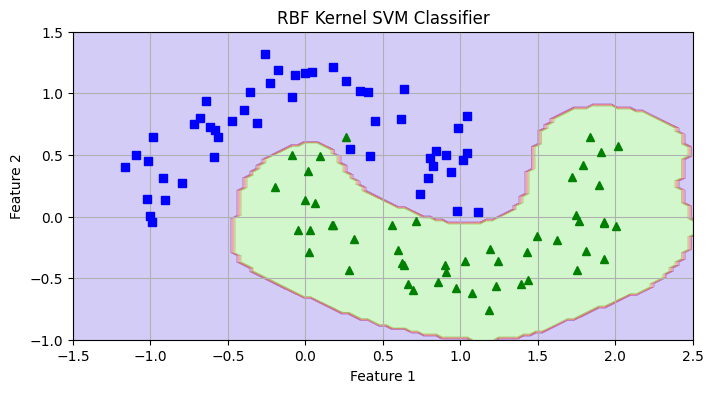

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

plt.figure(figsize=(8, 4))
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.title("RBF Kernel SVM Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

Here is a comparison table of `LinearSVC`, `SGDClassifier` (with hinge loss for SVM), and `SVC` in scikit-learn:

| Feature               | `LinearSVC`                               | `SGDClassifier` (loss='hinge')          | `SVC`                                      |
|-----------------------|-------------------------------------------|-----------------------------------------|--------------------------------------------|
| **Kernel**            | Linear                                    | Linear                                  | Linear, Polynomial, RBF, Sigmoid, etc.   |
| **Approach**          | Optimized for linear SVM                  | Stochastic Gradient Descent (SGD)       | Based on libsvm, supports various kernels  |
| **Scalability**       | Generally good for medium to large data   | Very good for large-scale data          | Can be slow for large datasets with kernels |
| **Optimization**      | Uses coordinate descent by default        | Uses SGD                                | Uses Sequential Minimal Optimization (SMO) |
| **Regularization (C)**| Controls the trade-off between margin and misclassification | Controls the penalty for misclassification | Controls the trade-off between margin and misclassification |
| **Dual/Primal**       | Can choose dual or primal formulation     | Primal formulation                      | Supports both (controlled by `dual` parameter) |
| **Intercept Scaling** | Supports intercept scaling                 | Does not directly support intercept scaling in the same way | Supports intercept scaling                 |
| **Use Case**          | Linear classification, good performance   | Large-scale linear classification      | Linear and non-linear classification      |

# SVM REGRESSION

SVM can also be used for regression tasks, known as Support Vector Regression (SVR). Instead of finding a boundary to separate classes, SVR finds a hyperplane that best fits the data points while keeping the errors within a certain margin.

Here's a breakdown:

*   **Goal:** To find a function that predicts a continuous output variable based on input features.
*   **How it works:** SVR aims to find a hyperplane that minimizes the error between the predicted values and the actual values, while also keeping the hyperplane as flat as possible (to avoid overfitting). It defines an "epsilon-tube" around the hyperplane, and data points within this tube are not penalized. The error is measured only for data points outside this tube.
*   **Key parameters:**
    *   **epsilon ($\epsilon$):** This parameter defines the width of the epsilon-tube. A larger epsilon means a wider tube and allows for more errors within the tube, leading to a smoother fit. A smaller epsilon means a narrower tube and penalizes more errors, potentially leading to a more complex fit.
    *   **C:** This is the regularization parameter, similar to the one in SVM classification. It controls the trade-off between minimizing the error and keeping the hyperplane flat. A smaller C allows for a flatter hyperplane but more errors, while a larger C penalizes errors more heavily, leading to a less flat hyperplane.
    *   **Kernel:** Like SVM classification, SVR can use different kernels (linear, polynomial, RBF, etc.) to handle non-linear relationships between the input features and the output variable.

In essence, SVR is about finding a balance between fitting the data well and maintaining a simple model (a flat hyperplane) to ensure good generalization to new data. It's particularly useful when dealing with data that has complex, non-linear relationships.

In [ ]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

In [ ]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

## Decision Functions and Predictions

In SVMs, after the model is trained, it uses a **decision function** to make predictions on new data points. This function essentially calculates a score for each data point, indicating its position relative to the decision boundary.

For classification tasks:

- If the decision function's output for a data point is positive, the model predicts that the point belongs to one class.
- If the output is negative, it predicts that the point belongs to the other class.
- The magnitude of the output indicates the confidence of the prediction and the distance of the point from the decision boundary. Points further away from the boundary have a larger absolute value of the decision function output and are classified with higher confidence.

For regression tasks (SVR):

- The decision function's output is the predicted continuous value for the data point.

In essence, the decision function is the mathematical rule learned by the SVM during training, and it's what the model uses to classify new data points or predict continuous values. Libraries like scikit-learn provide methods (e.g., `.decision_function()` and `.predict()`) to access the output of the decision function and the final predictions.

## Quadratic Programming in SVMs

Training a Support Vector Machine (SVM) to find the optimal hyperplane that separates data points can be formulated as an optimization problem. Specifically, it is often formulated as a **Quadratic Programming (QP)** problem.

Quadratic Programming is a type of mathematical optimization problem where the objective function is a quadratic function, and the constraints are linear.

In the context of SVMs:

*   **Objective Function:** The objective is to minimize a quadratic function related to the weights of the hyperplane. This objective corresponds to maximizing the margin between the classes.
*   **Constraints:** The constraints are linear inequalities that ensure that each data point is on the correct side of the margin (or within the allowed margin of error for soft margin SVMs).

Solving this Quadratic Programming problem allows the SVM algorithm to find the optimal values for the weights and bias of the hyperplane, which in turn defines the decision boundary.

While the details of the QP formulation can be complex, understanding that SVM training is fundamentally a QP problem helps to grasp the mathematical foundation of how SVMs find the best separating hyperplane. Libraries like scikit-learn handle the solving of this QP problem internally when you train an SVM model.

## The Dual Problem in SVMs

In the context of Support Vector Machines (SVMs), the training process can be formulated as either a **primal optimization problem** or a **dual optimization problem**. While both formulations ultimately lead to the same solution, the dual problem is often preferred for several reasons, especially when using kernels.

The primal problem aims to directly find the optimal weights ($\mathbf{w}$) and bias ($b$) of the hyperplane by minimizing a quadratic objective function subject to linear constraints. This involves optimizing over the dimensions of the feature space.

The dual problem, on the other hand, transforms the optimization problem into one that involves optimizing over the number of training instances. It introduces **Lagrange multipliers** ($\alpha_i$) for each training example. The dual problem's objective is to maximize a function that depends on these Lagrange multipliers, subject to certain constraints.

Here's why the dual problem is significant and often used:

* **Kernel Trick:** The most crucial advantage of the dual formulation is that it allows for the use of the kernel trick. The dual problem's objective function and constraints can be expressed in terms of dot products of the input features ($\mathbf{x}_i^T \mathbf{x}_j$). By replacing these dot products with a kernel function $K(\mathbf{x}_i, \mathbf{x}_j)$, we can implicitly map the data into a higher-dimensional space without explicitly calculating the coordinates in that space. This is computationally much more efficient, especially for high or infinite-dimensional feature spaces.
* **Sparsity:** The solution to the dual problem often results in many of the Lagrange multipliers ($\alpha_i$) being zero. The training examples corresponding to the non-zero $\alpha_i$ are the **support vectors**. These are the critical data points that lie on or within the margin and influence the position of the decision boundary. The fact that only a subset of training data (the support vectors) is needed to define the hyperplane makes SVMs memory efficient and faster for prediction, as only the support vectors need to be considered.
* **Computational Efficiency:** For datasets with a high number of features but a relatively smaller number of training examples, solving the dual problem can be computationally more efficient than solving the primal problem.

In summary, the dual problem in SVMs reformulates the optimization task in a way that enables the use of the kernel trick, leads to a sparse solution based on support vectors, and can be more computationally efficient in certain scenarios. It's the foundation for applying SVMs to non-linearly separable data using various kernels.

## Kernelized SVMs

Kernelized SVMs, also known as Non-linear SVMs, extend the power of Support Vector Machines to handle datasets that are not linearly separable in their original feature space. This is achieved through the use of **kernel functions** and the **kernel trick**.

As discussed in the explanation of the dual problem, the training of an SVM can be formulated such that the data points only appear in the form of dot products ($\mathbf{x}_i^T \mathbf{x}_j$). The kernel trick leverages this by replacing the explicit calculation of these dot products in a potentially high-dimensional space with a kernel function $K(\mathbf{x}_i, \mathbf{x}_j)$ that computes the equivalent similarity (dot product) in that space without ever explicitly transforming the data.

Essentially, a kernel function acts as a shortcut to compute the similarity between two data points in a higher-dimensional feature space. By using different kernel functions, SVMs can implicitly map the data into different high-dimensional spaces, making it possible to find a linear decision boundary in that transformed space, which corresponds to a non-linear decision boundary in the original space.

Commonly used kernel functions include:

*   **Linear Kernel:** $K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j$. This is the simplest kernel and results in a standard linear SVM.
*   **Polynomial Kernel:** $K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \mathbf{x}_i^T \mathbf{x}_j + r)^d$. This kernel maps the data into a polynomial feature space.
*   **Radial Basis Function (RBF) Kernel (Gaussian Kernel):** $K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma ||\mathbf{x}_i - \mathbf{x}_j||^2)$. This kernel maps the data into an infinite-dimensional space and is very flexible in creating complex decision boundaries.
*   **Sigmoid Kernel:** $K(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\gamma \mathbf{x}_i^T \mathbf{x}_j + r)$. This kernel is related to the sigmoid activation function in neural networks.

By selecting an appropriate kernel function, kernelized SVMs can effectively model complex, non-linear relationships in the data, making them powerful tools for a wide range of classification and regression problems. The choice of kernel and its parameters (like $\gamma$, $r$, and $d$) is crucial for achieving good performance and avoiding overfitting.

## Mercer's Theorem

**Mercer's theorem** is a crucial mathematical result that provides the conditions under which a function can be a valid kernel function for use in kernel methods like Support Vector Machines (SVMs). In simpler terms, it tells us when a similarity function $K(\mathbf{x}_i, \mathbf{x}_j)$ can be interpreted as a dot product in some higher-dimensional feature space.

The theorem states that a symmetric function $K(\mathbf{x}_i, \mathbf{x}_j)$ is a valid kernel function if and only if for any set of data points $\{\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_m\}$, the kernel matrix $\mathbf{K}$, where $K_{ij} = K(\mathbf{x}_i, \mathbf{x}_j)$, is **positive semi-definite**.

A positive semi-definite matrix is a symmetric matrix where for any non-zero vector $\mathbf{v}$, the quadratic form $\mathbf{v}^T \mathbf{K} \mathbf{v} \ge 0$.

**Why is this important for SVMs and the kernel trick?**

Mercer's theorem guarantees that if a function satisfies the positive semi-definite condition, there exists a mapping $\phi$ to a higher-dimensional space such that the kernel function is equivalent to the dot product in that space:

$K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)$

This is the essence of the **kernel trick**. Instead of explicitly defining and computing the mapping $\phi$ (which can be computationally expensive or even infinite-dimensional), we can simply use the kernel function $K$ in the dual formulation of the SVM. The optimization problem in the dual space only requires the dot products of the transformed data points, and the kernel function provides these dot products directly from the original data.

In summary, Mercer's theorem provides the theoretical foundation for using kernel functions in SVMs. It ensures that a valid kernel function implicitly corresponds to a dot product in some feature space, allowing us to perform non-linear classification and regression in the original space by solving a linear problem in the transformed space without ever explicitly working in that higher dimension.

## Online SVMs

Traditional Support Vector Machine (SVM) training is typically done in a **batch** setting, where the entire dataset is available at once and the model is trained on all the data points simultaneously. However, in scenarios where data arrives sequentially (e.g., real-time data streams), or when the dataset is too large to fit into memory, **online SVMs** become a useful alternative.

Online SVM algorithms process data points one at a time or in small batches (mini-batches) and update the model incrementally with each new data point. This approach is particularly well-suited for:

*   **Large datasets:** When the dataset is too big to be loaded into memory, online learning allows training on subsets of the data.
*   **Streaming data:** When data arrives continuously, online algorithms can update the model in real-time without retraining from scratch.
*   **Adapting to changing data:** Online SVMs can adapt to changes in the data distribution over time (concept drift).

Instead of solving a single large optimization problem like batch SVMs, online SVMs typically use iterative optimization methods, such as **Stochastic Gradient Descent (SGD)** or its variants. For each new data point, the model's parameters are updated based on the error made on that specific point.

Key characteristics of online SVMs:

*   **Incremental updates:** The model is updated with each new data point or mini-batch.
*   **Memory efficiency:** They do not require the entire dataset to be in memory.
*   **Adaptability:** They can adapt to changing data distributions.
*   **Convergence:** Convergence can be slower and less stable compared to batch methods, and the final solution might not be exactly the same as the batch solution.

In scikit-learn, the `SGDClassifier` class with `loss='hinge'` can be used to implement a linear online SVM. It uses Stochastic Gradient Descent to train a linear classifier with the hinge loss function, which is the standard loss for SVMs.

In essence, online SVMs provide a way to train SVM models on large, streaming, or evolving datasets by processing data points sequentially and updating the model incrementally.

## Hinge Loss

The **hinge loss** is a loss function commonly used in machine learning for training classifiers, particularly Support Vector Machines (SVMs). It's designed to penalize misclassifications and encourage a clear separation between classes.

The hinge loss for a single training example $(x, y)$ with a prediction function $f(x)$ (which outputs a score related to the distance from the decision boundary) is defined as:

$L_{hinge}(y, f(x)) = \max(0, 1 - y \cdot f(x))$

Where:
- $y$ is the true label of the example (typically +1 or -1 for binary classification).
- $f(x)$ is the output of the decision function for the example $x$.

Let's break down the formula:

- **$y \cdot f(x)$:** This term represents the product of the true label and the decision function output.
    - If $y$ and $f(x)$ have the same sign (meaning the prediction is on the correct side of the boundary), this product is positive.
    - If $y$ and $f(x)$ have opposite signs (meaning the prediction is on the wrong side of the boundary), this product is negative.
- **$1 - y \cdot f(x)$:** This term calculates the "margin error".
    - If $y \cdot f(x) \ge 1$, the example is correctly classified and lies outside the margin. The margin error is less than or equal to 0.
    - If $0 < y \cdot f(x) < 1$, the example is correctly classified but lies within the margin. The margin error is between 0 and 1.
    - If $y \cdot f(x) \le 0$, the example is misclassified. The margin error is greater than or equal to 1.
- **$\max(0, \dots)$:** This part of the function ensures that the loss is 0 if the margin error is less than or equal to 0. This means that if a data point is correctly classified and is outside the margin (with a "score" of 1 or more in the right direction), there is no penalty. If the data point is within the margin or misclassified, a penalty is incurred.

**Why is it called "hinge loss"?**

The shape of the hinge loss function resembles a hinge. It's linear for negative values of $y \cdot f(x)$ (misclassified points) and becomes flat (zero loss) for values of $y \cdot f(x)$ greater than or equal to 1 (correctly classified points outside the margin).

**Role in SVMs:**

In SVMs, the objective is to minimize the hinge loss (plus a regularization term). Minimizing the hinge loss encourages the model to:

1.  Correctly classify the data points.
2.  Push the correctly classified data points as far as possible from the decision boundary (maximize the margin).

The hinge loss's focus on the margin makes it well-suited for SVMs, which are designed to find a maximum margin hyperplane.